In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='dhiraj.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('dhiraj.zip')
f.keys()
!unzip "dhiraj"

Streaming output truncated to the last 5000 lines.
  inflating: dhiraj/train/odir5k/2721_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2722_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2722_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2723_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2723_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2724_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2724_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2725_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2725_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2726_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2726_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2727_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2727_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2728_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2728_right_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2729_left_aug_0.jpg  
  inflating: dhiraj/train/odir5k/2729_right_aug_0.jpg  
  inf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf


BATCH_SIZE = 32
IMG_SIZE = (224, 224)


dataset_directory = '/content/dhiraj/train'
test_dataset = '/content/dhiraj/test'



train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,
    subset="training",
    seed = 66
)


validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=0.2,
    subset="validation" ,
    seed= 66
)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dataset,
                                                                 shuffle=True,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE)


Found 8429 files belonging to 6 classes.
Using 6744 files for training.
Found 8429 files belonging to 6 classes.
Using 1685 files for validation.
Found 1395 files belonging to 6 classes.


In [ ]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

94668760/94668760 [==============================] - 3s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
base_model.trainable = True

In [ ]:
set_trainable = False

for layer in base_model.layers:
  if layer.name == 'conv5_block1_preact_bn':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name, " == ", layer.trainable)

input_2  ==  False
conv1_pad  ==  False
conv1_conv  ==  False
pool1_pad  ==  False
pool1_pool  ==  False
conv2_block1_preact_bn  ==  False
conv2_block1_preact_relu  ==  False
conv2_block1_1_conv  ==  False
conv2_block1_1_bn  ==  False
conv2_block1_1_relu  ==  False
conv2_block1_2_pad  ==  False
conv2_block1_2_conv  ==  False
conv2_block1_2_bn  ==  False
conv2_block1_2_relu  ==  False
conv2_block1_0_conv  ==  False
conv2_block1_3_conv  ==  False
conv2_block1_out  ==  False
conv2_block2_preact_bn  ==  False
conv2_block2_preact_relu  ==  False
conv2_block2_1_conv  ==  False
conv2_block2_1_bn  ==  False
conv2_block2_1_relu  ==  False
conv2_block2_2_pad  ==  False
conv2_block2_2_conv  ==  False
conv2_block2_2_bn  ==  False
conv2_block2_2_relu  ==  False
conv2_block2_3_conv  ==  False
conv2_block2_out  ==  False
conv2_block3_preact_bn  ==  False
conv2_block3_preact_relu  ==  False
conv2_block3_1_conv  ==  False
conv2_block3_1_bn  ==  False
conv2_block3_1_relu  ==  False
conv2_block3_2_pad  =

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds)

Epoch 1/100
211/211 [==============================] - 53s 196ms/step - loss: 1.1397 - accuracy: 0.9133 - val_loss: 9.5218 - val_accuracy: 0.9217
Epoch 2/100
211/211 [==============================] - 35s 167ms/step - loss: 0.1949 - accuracy: 0.9480 - val_loss: 0.6564 - val_accuracy: 0.9507
Epoch 3/100
211/211 [==============================] - 35s 165ms/step - loss: 0.1362 - accuracy: 0.9564 - val_loss: 0.5978 - val_accuracy: 0.9466
Epoch 4/100
211/211 [==============================] - 40s 190ms/step - loss: 0.1046 - accuracy: 0.9635 - val_loss: 0.3955 - val_accuracy: 0.9608
Epoch 5/100
211/211 [==============================] - 35s 164ms/step - loss: 0.0926 - accuracy: 0.9668 - val_loss: 0.9847 - val_accuracy: 0.9602
Epoch 6/100
211/211 [==============================] - 35s 165ms/step - loss: 0.0811 - accuracy: 0.9711 - val_loss: 0.5525 - val_accuracy: 0.9596
Epoch 7/100
211/211 [==============================] - 40s 189ms/step - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.4394 -

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_dataset.map(process)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


44/44 [==============================] - 4s 95ms/step - loss: 1.5341 - accuracy: 0.9240
Test Loss: 1.5341
Test Accuracy: 0.9240


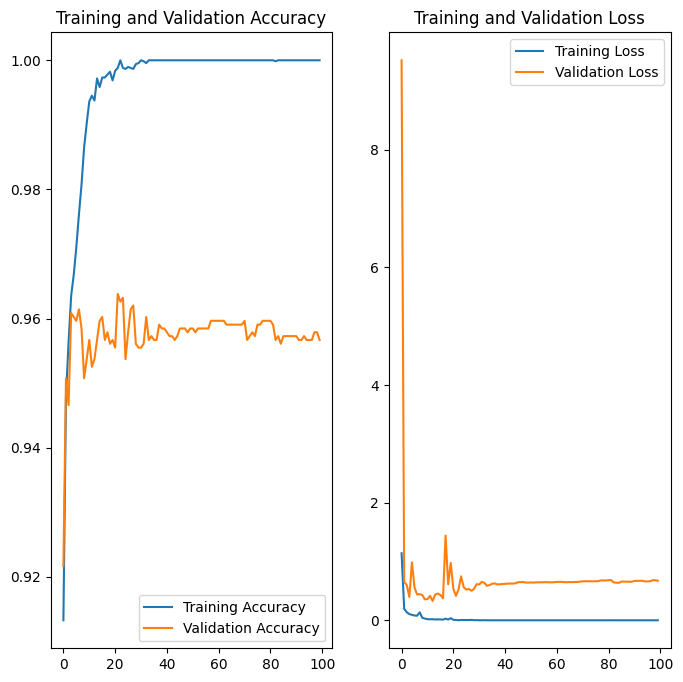

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=100
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

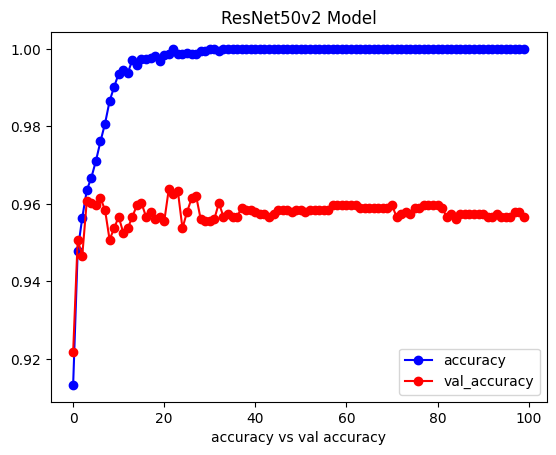

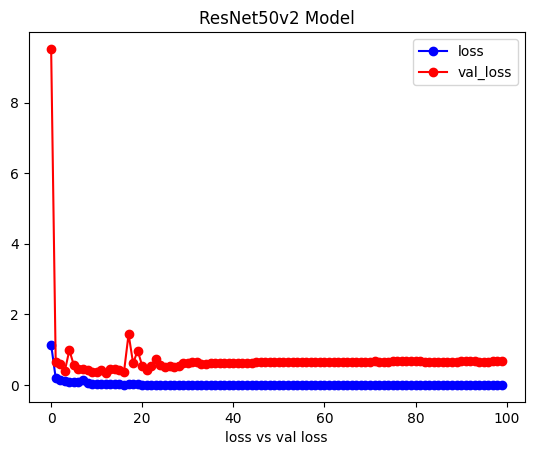

In [ ]:
def plot_graph(history, string, model_id, title):
    plt.plot(history.history[string], 'b-o', label=string)
    plt.plot(history.history['val_' + string], 'r-o', label='val_' + string)
    plt.xlabel(string + ' vs val ' + string)
    plt.legend()
    plt.title(title)
    plt.savefig('learning_curve_' + string + '_' + model_id + '.png')
    plt.show()

plot_graph(history, 'accuracy', '1', 'ResNet50v2 Model')
plot_graph(history, 'loss', '1', 'ResNet50v2 Model')

1/1 [==============================] - 0s 28ms/step


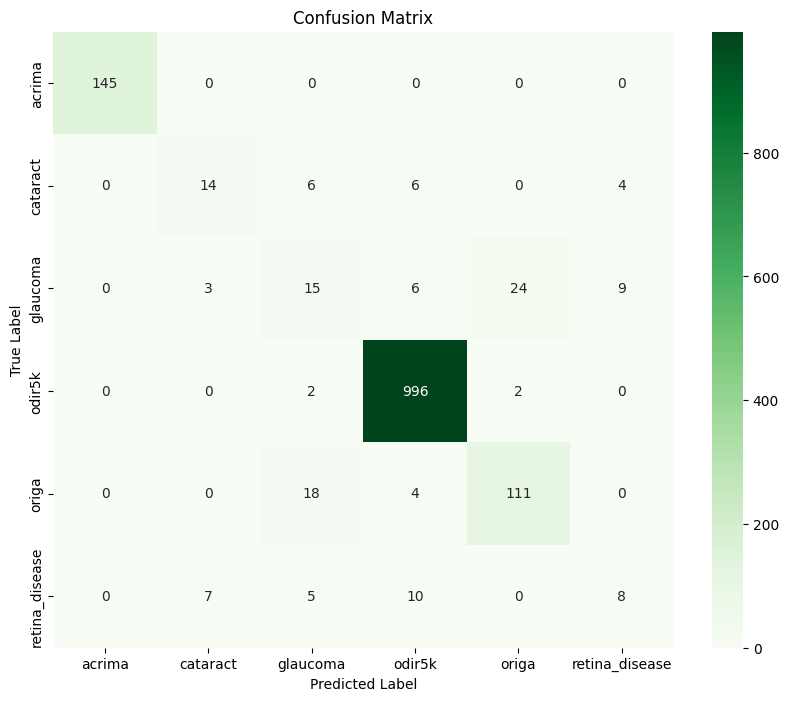

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = validation_dataset.class_names
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())


cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

1/1 [==============================] - 0s 22ms/step
F1 Score: 0.6551485952678205
Precision: 0.6791918892996828
Recall: 0.6378462823725982
ROC-AUC Score: 0.894404422803328
Class 0 - Precision: 1.0, Recall: 1.0, F1-Score: 1.0, ROC-AUC: 1.0
Class 1 - Precision: 0.5833333333333334, Recall: 0.4666666666666667, F1-Score: 0.5185185185185186, ROC-AUC: 0.9672771672771672
Class 2 - Precision: 0.32608695652173914, Recall: 0.2631578947368421, F1-Score: 0.2912621359223301, ROC-AUC: 0.9324207379435134
Class 3 - Precision: 0.974559686888454, Recall: 0.996, F1-Score: 0.9851632047477745, ROC-AUC: 0.9843189873417721
Class 4 - Precision: 0.8102189781021898, Recall: 0.8345864661654135, F1-Score: 0.8222222222222222, ROC-AUC: 0.9889660760458993
Class 5 - Precision: 0.38095238095238093, Recall: 0.26666666666666666, F1-Score: 0.3137254901960784, ROC-AUC: 0.9297191697191698


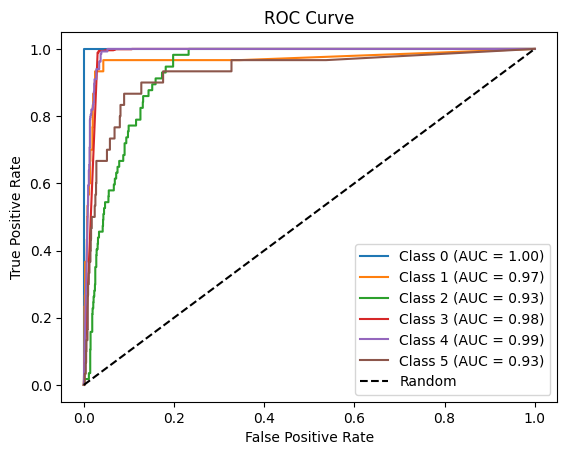

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a validation_dataset
test_ds = test_ds.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in test_ds:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Calculate precision, recall, F1-score, and ROC-AUC score for each class
precision_per_class = precision_score(y_true, y_pred_classes, average=None)
recall_per_class = recall_score(y_true, y_pred_classes, average=None)
f1_per_class = f1_score(y_true, y_pred_classes, average=None)

roc_auc_per_class = []
for i in range(y_pred.shape[1]):
    roc_auc_per_class.append(roc_auc_score(y_true == i, y_pred[:, i]))

# Print metrics for each class
for i in range(y_pred.shape[1]):
    print(f"Class {i} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}, F1-Score: {f1_per_class[i]}, ROC-AUC: {roc_auc_per_class[i]}")

# Plot ROC curves
plt.figure()
for i in range(y_pred.shape[1]):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
model.save('dhiraj_resnet50v2_transfer_learning')

In [ ]:
#################################################################################################### END OF RESNET50V2 MODEL ####################################################################################################

In [ ]:
base_model = keras.applications.densenet.DenseNet121(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
base_model.trainable = True

In [ ]:
set_trainable = False

for layer in base_model.layers:
  if layer.name == 'conv5_block1_0_bn':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name, " == ", layer.trainable)

input_3  ==  False
zero_padding2d  ==  False
conv1/conv  ==  False
conv1/bn  ==  False
conv1/relu  ==  False
zero_padding2d_1  ==  False
pool1  ==  False
conv2_block1_0_bn  ==  False
conv2_block1_0_relu  ==  False
conv2_block1_1_conv  ==  False
conv2_block1_1_bn  ==  False
conv2_block1_1_relu  ==  False
conv2_block1_2_conv  ==  False
conv2_block1_concat  ==  False
conv2_block2_0_bn  ==  False
conv2_block2_0_relu  ==  False
conv2_block2_1_conv  ==  False
conv2_block2_1_bn  ==  False
conv2_block2_1_relu  ==  False
conv2_block2_2_conv  ==  False
conv2_block2_concat  ==  False
conv2_block3_0_bn  ==  False
conv2_block3_0_relu  ==  False
conv2_block3_1_conv  ==  False
conv2_block3_1_bn  ==  False
conv2_block3_1_relu  ==  False
conv2_block3_2_conv  ==  False
conv2_block3_concat  ==  False
conv2_block4_0_bn  ==  False
conv2_block4_0_relu  ==  False
conv2_block4_1_conv  ==  False
conv2_block4_1_bn  ==  False
conv2_block4_1_relu  ==  False
conv2_block4_2_conv  ==  False
conv2_block4_concat  ==  

In [ ]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
epochs = 100
history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/100
211/211 [==============================] - 60s 193ms/step - loss: 1.8635 - accuracy: 0.9158 - val_loss: 27.2672 - val_accuracy: 0.9430
Epoch 2/100
211/211 [==============================] - 31s 145ms/step - loss: 0.1810 - accuracy: 0.9563 - val_loss: 15.6910 - val_accuracy: 0.9294
Epoch 3/100
211/211 [==============================] - 36s 168ms/step - loss: 0.1157 - accuracy: 0.9669 - val_loss: 1.0249 - val_accuracy: 0.9389
Epoch 4/100
211/211 [==============================] - 31s 144ms/step - loss: 0.0688 - accuracy: 0.9729 - val_loss: 0.2041 - val_accuracy: 0.9644
Epoch 5/100
211/211 [==============================] - 30s 143ms/step - loss: 0.0532 - accuracy: 0.9794 - val_loss: 0.2395 - val_accuracy: 0.9650
Epoch 6/100
211/211 [==============================] - 31s 145ms/step - loss: 0.0449 - accuracy: 0.9825 - val_loss: 0.2457 - val_accuracy: 0.9513
Epoch 7/100
211/211 [==============================] - 36s 168ms/step - loss: 0.0352 - accuracy: 0.9874 - val_loss: 0.4220

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


1395/1395 [==============================] - 24s 15ms/step - loss: 0.7882 - accuracy: 0.9484
Test Loss: 0.7882
Test Accuracy: 0.9484


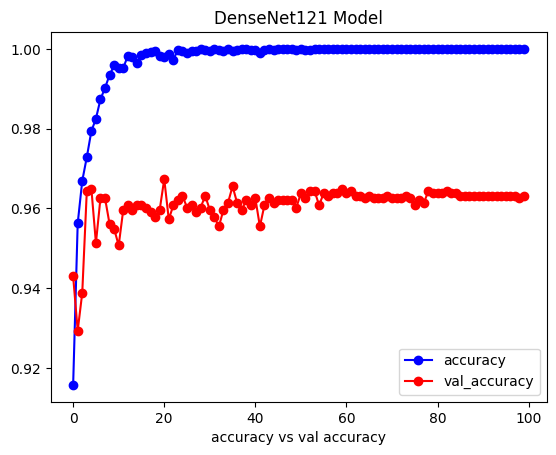

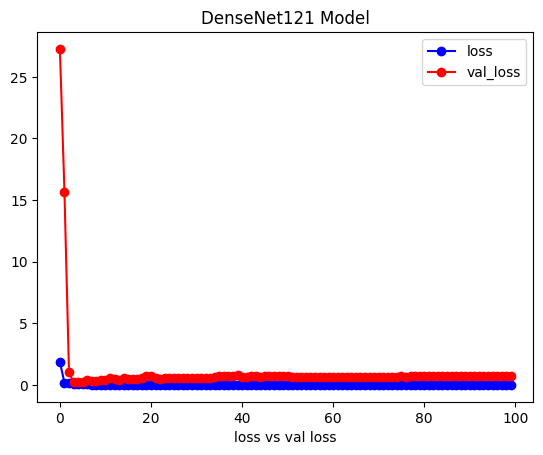

In [ ]:
def plot_graph(history, string, model_id, title):
    plt.plot(history.history[string], 'b-o', label=string)
    plt.plot(history.history['val_' + string], 'r-o', label='val_' + string)
    plt.xlabel(string + ' vs val ' + string)
    plt.legend()
    plt.title(title)
    plt.savefig('learning_curve_' + string + '_' + model_id + '.png')
    plt.show()

plot_graph(history, 'accuracy', '1', 'DenseNet121 Model')
plot_graph(history, 'loss', '1', 'DenseNet121 Model')

1/1 [==============================] - 0s 32ms/step


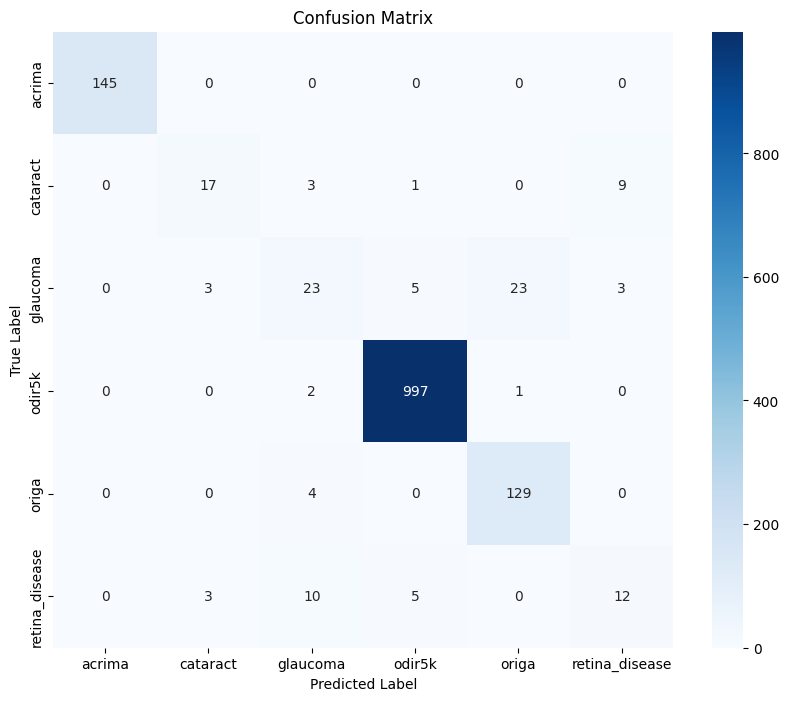

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = validation_dataset.class_names
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())


cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

1/1 [==============================] - 0s 29ms/step
F1 Score: 0.7409543555995484
Precision: 0.7698290064818197
Recall: 0.7228500417710945
ROC-AUC Score: 0.9345817960281829
Class 0 - Precision: 1.0, Recall: 1.0, F1-Score: 1.0, ROC-AUC: 1.0
Class 1 - Precision: 0.7391304347826086, Recall: 0.5666666666666667, F1-Score: 0.6415094339622641, ROC-AUC: 0.9863247863247864
Class 2 - Precision: 0.5476190476190477, Recall: 0.40350877192982454, F1-Score: 0.4646464646464647, ROC-AUC: 0.959811711640836
Class 3 - Precision: 0.9890873015873016, Recall: 0.997, F1-Score: 0.993027888446215, ROC-AUC: 0.9946835443037976
Class 4 - Precision: 0.8431372549019608, Recall: 0.9699248120300752, F1-Score: 0.9020979020979021, ROC-AUC: 0.9913402762055694
Class 5 - Precision: 0.5, Recall: 0.4, F1-Score: 0.4444444444444445, ROC-AUC: 0.9630769230769232


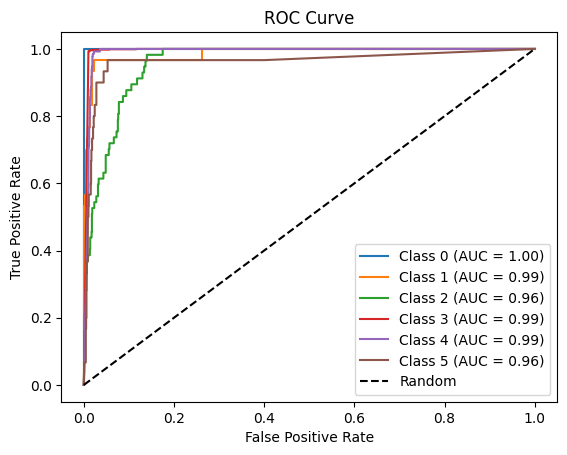

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a validation_dataset
test_ds = test_ds.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in test_ds:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Calculate precision, recall, F1-score, and ROC-AUC score for each class
precision_per_class = precision_score(y_true, y_pred_classes, average=None)
recall_per_class = recall_score(y_true, y_pred_classes, average=None)
f1_per_class = f1_score(y_true, y_pred_classes, average=None)

roc_auc_per_class = []
for i in range(y_pred.shape[1]):
    roc_auc_per_class.append(roc_auc_score(y_true == i, y_pred[:, i]))

# Print metrics for each class
for i in range(y_pred.shape[1]):
    print(f"Class {i} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}, F1-Score: {f1_per_class[i]}, ROC-AUC: {roc_auc_per_class[i]}")

# Plot ROC curves
plt.figure()
for i in range(y_pred.shape[1]):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
